# Objectif phase Exploration
L'objectif de cette phase est de comprendre 
- l'orchestration du dataset
- la qualité de ses datas
- leur typage 
### et bien sûr de preprocessé les datas dans le but de modeliser les phénomènes de l'étape 2 à savoir l'emission de CO2 dans les batiements ainsi que les emissions total GHGE par batiment sans mesure et avec des datas declaratives. 

# Etape 1 - Chargement des libraires. 

In [114]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Etape 2 - chargement des dataframes et fusion

In [115]:
frame2015 = pd.read_csv("../DataSet/2015-building-energy-benchmarking.csv")
frame2016 = pd.read_csv("../DataSet/2016-building-energy-benchmarking.csv")
dataF = frame2015.append(frame2016)
dataF

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,Zip Codes,Address,City,State,ZipCode,Latitude,Longitude,Comments,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,18081.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,18081.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,...,18081.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,...,18081.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,...,19576.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1624049080,NaN,2,GREATER DUWAMISH,1990,...,NaN,1600 S Dakota St,Seattle,WA,NaN,47.56722,-122.31154,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,3558300000,NaN,2,DOWNTOWN,2004,...,NaN,719 8th Ave S,Seattle,WA,NaN,47.59625,-122.32283,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1794501150,NaN,7,MAGNOLIA / QUEEN ANNE,1974,...,NaN,1920 1st Ave W,Seattle,WA,NaN,47.63644,-122.35784,NaN,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,7883603155,NaN,1,GREATER DUWAMISH,1989,...,NaN,8319 8th Ave S,Seattle,WA,NaN,47.52832,-122.32431,NaN,22.11,1.57


Les datasets fusionnés sont assez petits. Ils comprennent un ensemble de:
- 6716 lignes 
- 56 colonnes.

# Etape 3 - Pretraitement des datas et drop_duplicates

Avant d'entrer dans l'exploration des datas. Nous supprimons les lignes exactement identiques. 

In [116]:
# drop duplicates
dataF = dataF.drop_duplicates()

# Etape 4 - Etude de la propreté des data
</br> Les éléments blues sont les valeurs nulles pour chaque variable positionnée en absice. Aussi plus il y'a de de traits bleus plus les datas sont sales. Ici les datas sont plutôt propre. Seulement certaine variable sont concernée par le problème. 

<AxesSubplot:>

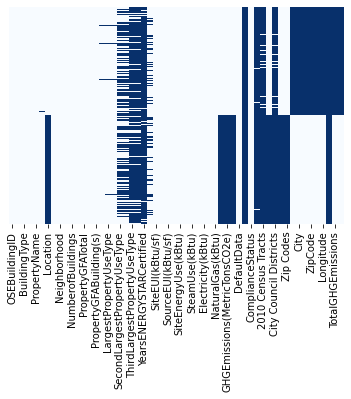

In [117]:
sns.heatmap(dataF.isnull(), yticklabels = False, cbar = False, cmap="Blues")

Les variables dont les datas semblent nécessiter un traitement particulier pour les valeurs nulls semblent être 
pour les variables continues:
- Longitude
- ZipCode
- City
- Council District Code 
- GHGEmissions(MetricTonsCO2e). 

Par ailleurs ils semblent que les variables GHGEmissions(MetricTonsCO2e) soient null quand TotalGHGEEmission ne l'est pas et inversement. Il faudra donc en tenir compte lors de la phase de modelisation. Certaines colonnes comme longitude ou censur track semblent être pratiquement vide. 

# Etape 5  - Entrons dans le détail de la qualité des datas
</br> Creation d'un dataframe reprenant les caracteristiques primaires de chaque variable. 
- Taux de remplissage des colonnes (Sans Null ni NaN)
- nombre de valeurs distinctes 
- type de valeur 

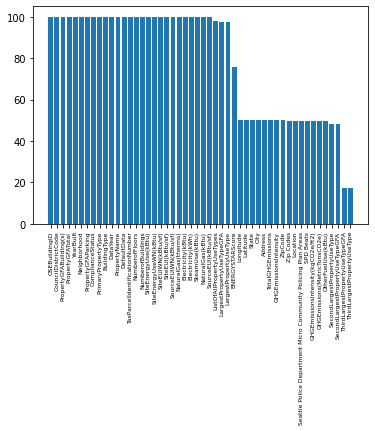

<Figure size 2160x1440 with 0 Axes>

In [118]:
nonNullRate = []
for col in dataF.columns: 
    #we are counting the row with data and without Null or NaN over the number of rows
    nonNullRate.append({"columns": col, "type": str(dataF[col].dtypes) ,"filledRatio": round((dataF[col].count()/dataF.shape[0])*100, 3), "nbValues": dataF[col].nunique()})
nonNullRateFrame = pd.DataFrame(nonNullRate)    
#Etape de filtre
lessThanOnePercentColumns = nonNullRateFrame[nonNullRateFrame["filledRatio"] < 10]
moreThanOnePercentColumns = nonNullRateFrame[nonNullRateFrame["filledRatio"] >10]

moreThanOnePercentColumns = moreThanOnePercentColumns.sort_values(by=["filledRatio"], ascending=False)
plt.bar(moreThanOnePercentColumns["columns"].values, moreThanOnePercentColumns['filledRatio'].values)
plt.xticks(rotation=90, fontsize=6)
plt.figure(figsize=(30,20))
plt.show()

Une bonne partie des colonnes (45) sont remplies au delà de 50% ce qui confirme que la qualité des datas est assez bonne. 

- 22 sont de type float
- 13 sont des chaines de caractères 
- 10 sont de type entier. 

# Traitement des colonnes dont les datas sont sales. 

['ThirdLargestPropertyUseTypeGFA' 'YearsENERGYSTARCertified'
 '2010 Census Tracts' 'City Council Districts' 'Outlier' 'Comment'
 'Comments']


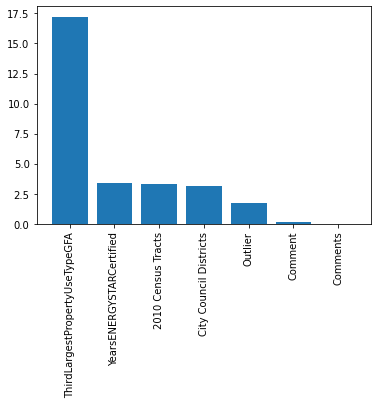

<Figure size 2160x1440 with 0 Axes>

In [151]:
lessThanOnePercentColumns = lessThanOnePercentColumns.sort_values(by=["filledRatio"], ascending=False)
plt.bar(lessThanOnePercentColumns["columns"].values, lessThanOnePercentColumns['filledRatio'].values)
print(lessThanOnePercentColumns["columns"].values)
plt.xticks(rotation=90, fontsize=10)
plt.figure(figsize=(30,20))
plt.show()

Les variables dont le taux de remplissages est < 10% est assez faible (6). 
Elles semblent inutiles pour la suite du travail.  

# Etape 6 - étude des variables categorielles du dataset 

On se focalise sur les variables ayant moins 100 valeurs distinctes et de type string. 

In [119]:
categorialColumn = moreThanOnePercentColumns[moreThanOnePercentColumns["nbValues"] < 100]
categorialColumn = categorialColumn[categorialColumn["type"] == "object"]
categorialColumn

,columns,type,filledRatio,nbValues
8,Neighborhood,object,100.000,19
40,ComplianceStatus,object,100.000,5
3,PrimaryPropertyType,object,100.000,32
2,BuildingType,object,100.000,8
38,DefaultData,object,99.985,4
16,LargestPropertyUseType,object,97.677,57
49,State,object,50.268,1
48,City,object,50.268,1
18,SecondLargestPropertyUseType,object,48.213,50
20,ThirdLargestPropertyUseType,object,17.213,45


Elles sont au nombre de 10 et 2 d'entres elles non qu'une seule valeur: 
- City 
- State

Que l'on peut sans doute oublier à la vue de la pauvreté des informations qu'elles apportent. 

# Hypothèse : ces variables categorielles sont une bonne base pour modeliser les phénomènes demandées d'emission et de consommation. 


# Etape 7 - pretraitement de Neighborhood et PrimaryPropertyType 
Variable categoriel pour en limiter le nombre de valeurs distinctes.
- Strip()
- lower()
- stockage des NaN dans des categories => "other"

<AxesSubplot:>

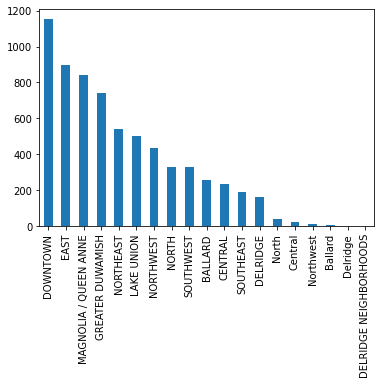

In [120]:
dataF['Neighborhood'].value_counts().plot(kind='bar')

In [121]:

#pretraitement de Neighborhood
dataF["Neighborhood"] = dataF["Neighborhood"].str.lower()
dataF["Neighborhood"] = dataF["Neighborhood"].str.replace(" neighborhoods", "")
dataF["Neighborhood"] = dataF["Neighborhood"].str.strip()
dataF["Neighborhood"] = dataF["Neighborhood"].replace(np.nan, "other")

dataF["NeighborhoodInt"]  = dataF["Neighborhood"]
uniqueNeighbourhouds = list(np.unique(dataF["Neighborhood"].values))
for key in range(0, len(uniqueNeighbourhouds)):
    dataF["NeighborhoodInt"] = dataF["NeighborhoodInt"].replace(uniqueNeighbourhouds[key], key)


<AxesSubplot:>

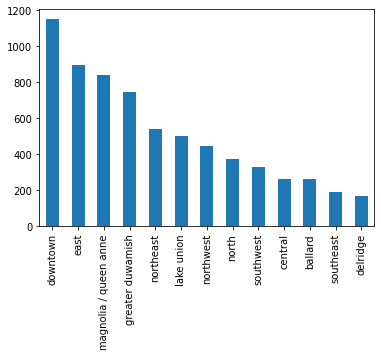

In [122]:
dataF['Neighborhood'].value_counts().plot(kind='bar')

<b>Le pre-traitement semble efficace et a bien limité le nombre de variables distinctes. </b>

# Exension du même pretraitement de la variable PrimaryPropertyType et des autres variables categorielles

<AxesSubplot:>

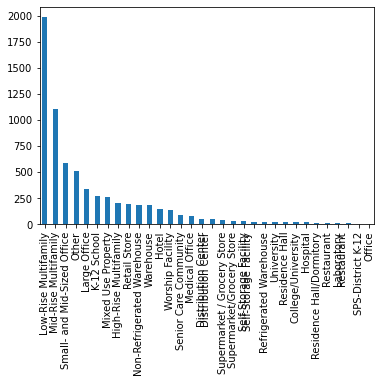

In [123]:
#post traitement - Visuel d'une des variables categorielles par nombre d'instances par valeurs 
dataF['PrimaryPropertyType'].value_counts().plot(kind='bar')

In [124]:
#pretraitement des variables categorielles. 

for column in list(categorialColumn["columns"]):
    dataF[column] = dataF[column].str.lower()
    #dataF["PrimaryPropertyType"] = dataF["PrimaryPropertyType"].str.replace(" neighborhoods", "")
    dataF[column] = dataF[column].str.strip()
    dataF[column] = dataF[column].replace(np.nan, "other")
    dataF[column] = dataF[column].replace(" / ", "/")
    uniquePropertyType = list(np.unique(dataF[column].values))
    dataF[column]  = dataF[column] 

<AxesSubplot:>

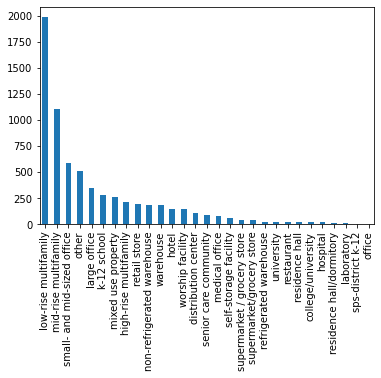

In [125]:
#post traitement - Visuel d'une des variables categorielles par nombre d'instances par valeurs 
dataF['PrimaryPropertyType'].value_counts().plot(kind='bar')

<b>Idem que pour Neighborhoud, le pre-traitement de PrimaryPropertyType semble avoir été efficace.</b>

# Etape 8 - preprocessing BuildingType

<AxesSubplot:>

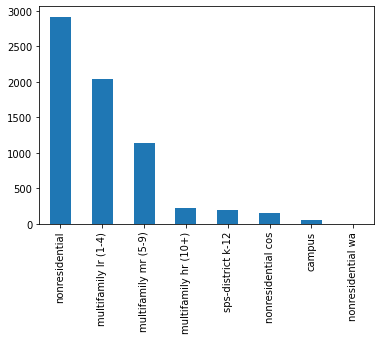

In [126]:
dataF['BuildingType'].value_counts().plot(kind='bar')

[0, 1, 2, 3, 4, 5, 6, 7]


<AxesSubplot:>

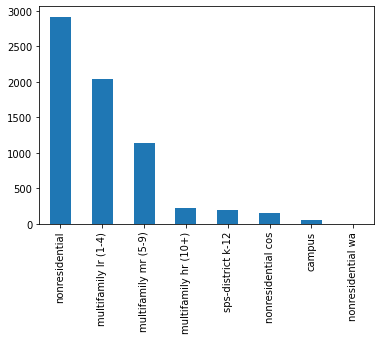

In [127]:
#preprocessing BuildingType

dataF["BuildingType"] = dataF["BuildingType"].str.lower()
dataF["BuildingType"] = dataF["BuildingType"].str.strip()
dataF["BuildingType"] = dataF["BuildingType"].replace(np.nan, "other")
dataF["BuildingTypeInt"] = dataF["BuildingType"]
currentType = list(np.unique(dataF["BuildingType"].values))

for btypeKey in range(len(currentType)):
    #print(btypeKey)
    dataF["BuildingTypeInt"] = dataF["BuildingTypeInt"].replace(currentType[btypeKey], btypeKey)
print(list(np.unique(dataF["BuildingTypeInt"].values)))
dataF['BuildingType'].value_counts().plot(kind='bar')

# Etude visuelle de la variable categorielle DefaultData

<AxesSubplot:>

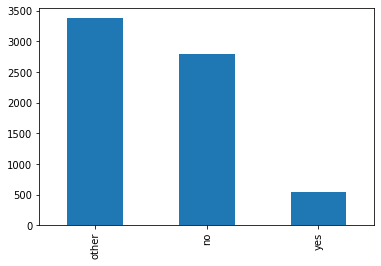

In [128]:
dataF['DefaultData'].value_counts().plot(kind='bar')

L'étude de la variable categorielle DefaultData nous montre qu'elle n'apporte pas d'information pertinente sur les batiments et lieux à étudier. 

# Etape 8 - creation d'un filtre/mask sur les variables continues de type emission/consommation. 

On distingue 3 categories de variables évoquant soit par metre carré soit par batiment un type d'emission/consommation. Elles sont exprimées en : 

- Kbtu 
- CO2
- KwH

In [129]:
nonNullRateFrame.columns.str.contains("kbtu")
kbtusColumns = nonNullRateFrame[nonNullRateFrame["columns"].str.contains("kBtu")]
CO2Columns = nonNullRateFrame[nonNullRateFrame["columns"].str.contains("CO2")]
kwhColumns = nonNullRateFrame[nonNullRateFrame["columns"].str.contains("kWh")]

In [167]:
listToChange = list(kwhColumns['columns'].values) + list(CO2Columns['columns'].values) + list(kbtusColumns['columns'].values)
print(listToChange)
listToChange2 = listToChange + ["NaturalGas(therms)", "LargestPropertyUseType", "ListOfAllPropertyUseTypes", "TotalGHGEmissions", "Latitude", "Longitude", "YearBuilt", "ZipCode", "ENERGYSTARScore", "NumberofBuildings", "NumberofFloors", "CouncilDistrictCode", "ListOfAllPropertyUseTypes"]
#listToChange = listToChange.append(list(CO2Columns['columns'].values))#.append(list(kbtusColumns['columns'].values))

['Electricity(kWh)', 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)']


13


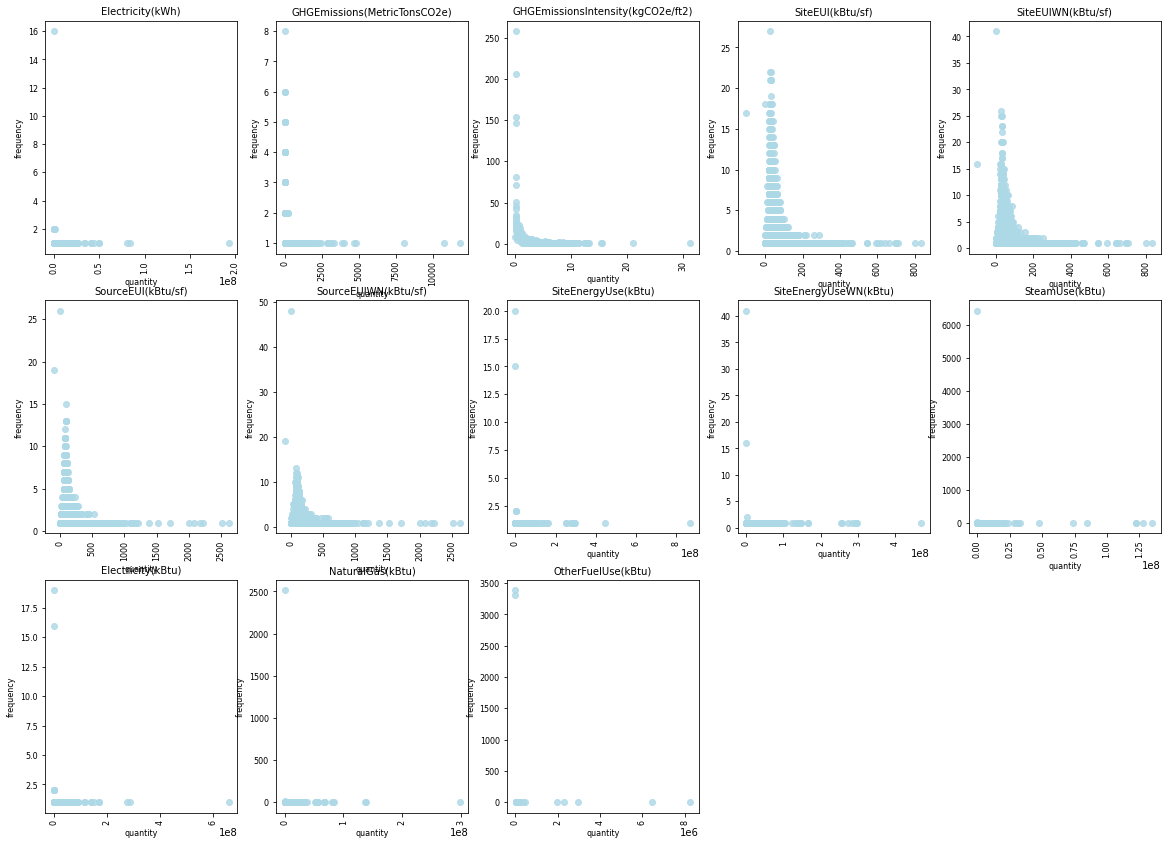

In [170]:
hist = plt.figure(figsize=(20, 30))
print(len(listToChange))
for columnIndex in range(len(listToChange)):
    #print(wineSet.columns.values[columnIndex])
    #figsize(10, 10))
    
    adjustedColumnIndex = int((columnIndex+1)/3)
    ax = hist.add_subplot(6, 5, (columnIndex+1))#, adjustedColumnIndex+1)
    currentColumn = listToChange[columnIndex]

    #wrong format of data for quantities inside product 
    #let's force it to numeric and replace string by NaN with coerce
    #dataF[currentColumn] = pd.to_numeric(dataF[currentColumn], errors='coerce')
    #let's isolate NaN with -1000 outside datarange
    #dataF[currentColumn] = dataF[currentColumn].replace("nan", -1000).replace(np.nan, -1000)
    
    currentValues = dataF[dataF[currentColumn] != -1000]
    #currentValues = nutriFrame[nutriFrame[currentColumn] >= -20]
    valuesFrame = currentValues[currentColumn].value_counts().to_frame()
    #print(valuesFrame.index.values)
    ax.scatter(x=valuesFrame.index.values, y=valuesFrame.values, 
               color='lightblue',
               alpha=0.8)#, label=currentColumn,  bins=50, color='lightblue', alpha=0.5)
    plt.xlabel("quantity", fontsize=8)
    plt.xticks(fontsize=8, rotation=90)
    plt.yticks(fontsize=8)
    plt.ylabel("frequency", fontsize=8)
    ax.set_title(currentColumn, fontsize=10)

# Etude visuelle de la variable continue OtherFuelUse(kBtu)

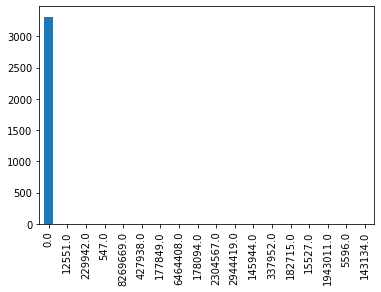

In [131]:
dataF["OtherFuelUse(kBtu)"].value_counts().plot(kind="bar")
list(kbtusColumns['columns'].values).remove("OtherFuelUse(kBtu)")

<b>La quasi totalité des valeurs de OtherFuelUse(kBtu) sont à 0. </b>

# Etape 9 - Ajout de la colonne Total KBTU
Qui reprend l'ensemble de la consommation du batiment hors variable par surface. 
<br/>
Ceci peut être interessant pour évaluer la consommation totale par batiment.

In [132]:
kbtusColumn = ["SiteEnergyUse(kBtu)", "SteamUse(kBtu)", "Electricity(kBtu)", "NaturalGas(kBtu)"]
totalKbtu = []
for row in range(dataF.shape[0]):
    Kbtu = []
    for column in dataF.columns:
        if column in kbtusColumn and not column.__contains__("/sf") and column != "OtherFuelUse(kBtu)":
            if dataF.iloc[row][column]:
                Kbtu.append(dataF.iloc[row][column])
    totalKbtu.append(sum(Kbtu))
dataF["totalKbtu"] = totalKbtu


## Etape 10  - Traitement de ENERGYSTARScore 

Par convention, nous allons utilisé les couleurs officielles de l'EnergyStarScore pour, plus tard, faciliter les visuels et les stocker dans une variable 

### ENERGYSTARScore
- A Remplacement des Nan par une valeur cible => 111 par faciliter de filtre/mask

### ENERGYSTARScoreColor 
- A Remplacement des hors score par une valeur cible => Black par faciliter de filtre/mask



In [133]:
#Let's keep only EnergyScore with value <= 100

cleanDataF = dataF
cleanDataF["ENERGYSTARScore"] = cleanDataF["ENERGYSTARScore"].replace(np.nan, 111)
cleanDataF["ENERGYSTARScoreColor"] = cleanDataF["ENERGYSTARScore"]

for i in range(0, cleanDataF.shape[0]):
    a = cleanDataF["ENERGYSTARScoreColor"].iloc[i]
    if int(a) >= 0 & int(a) <= 25:
        cleanDataF["ENERGYSTARScoreColor"].iloc[i] = "red"
    if int(a) > 25 & int(a) <= 75:
        cleanDataF["ENERGYSTARScoreColor"].iloc[i] = "yellow"
    if int(a) > 75 & int(a) <= 100:
        cleanDataF["ENERGYSTARScoreColor"].iloc[i] = "green"
    if int(a) == 111: # & int(a) <= 100:
        cleanDataF["ENERGYSTARScoreColor"].iloc[i] = "black"
cleanDataF["ENERGYSTARScoreColor"].value_counts()

/Users/benjamindeplus/.local/share/virtualenvs/Seattle2050-kF-VE2eh/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


green     4413
black     1623
yellow     569
red        111
Name: ENERGYSTARScoreColor, dtype: int64

<AxesSubplot:>

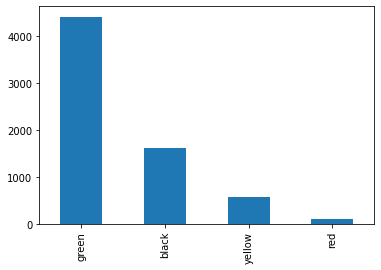

In [134]:

dataF['ENERGYSTARScoreColor'].value_counts().plot(kind='bar')

Bar Chart de la colonne nouvelle créée. 

### Mise à jour du dataframe d'orchestration avec les nouvelles colonnes et pre-traitement. 

In [135]:
nonNullRate = []
for col in cleanDataF.columns: 
    #we are counting the row with data and without Null or NaN over the number of rows
    nonNullRate.append({"columns": col, "type": str(cleanDataF[col].dtypes) ,"filledRatio": round((cleanDataF[col].count()/cleanDataF.shape[0])*100, 3), "nbValues": cleanDataF[col].nunique()})
nonNullRateFrame = pd.DataFrame(nonNullRate)    
#Etape de filtre
lessThanOnePercentColumns = nonNullRateFrame[nonNullRateFrame["filledRatio"] < 40]
moreThanOnePercentColumns = nonNullRateFrame[nonNullRateFrame["filledRatio"] > 10]
lessThanOnePercentColumns.describe
len(list(lessThanOnePercentColumns["columns"]))

7

Il ne reste plus que 7 colonnes remplies à moins de 40%. La propreté des datas est en forte hausse. 


# Etape 10 - Pre-traitement de la GHGEmissions(MetricTonsCO2e) et des autres variables continues qui semblent être assez impactées par la présence de NaN.

</br> Remplacement des NaN par une valeur cible -1000 afin lors de la phase de modelisation de pouvoir facilement filtrer le dataset.  

In [136]:
#cleanDataF["GHGEmissions(MetricTonsCO2e)"].value_counts()
#cleanDataF["GHGEmissions(MetricTonsCO2e)"].replace(np.nan, -1).value_counts().to_frame()
cleanDataF["GHGEmissions(MetricTonsCO2e)"] = cleanDataF["GHGEmissions(MetricTonsCO2e)"].replace(np.nan, -1000)
print(cleanDataF["GHGEmissions(MetricTonsCO2e)"].value_counts())

-1000.00    3386
 4.65          8
 4.55          6
 3.54          6
 3.47          6
            ... 
 52.79         1
 56.54         1
 22.01         1
 752.57        1
 16.74         1
Name: GHGEmissions(MetricTonsCO2e), Length: 2764, dtype: int64


GHGEmissions(MetricTonsCO2e) est très impacté par le phénomène comme nous l'avions presenti en étape 3 la moitié des valeurs environ sont NaN. On observe en revanche que ces variables ne sont pas atteintes par d'outliers particuliers notamment par des valeurs negatives. 

# Extension de ce pre-traitement sur les variables continues obesrvées en étape 3

In [137]:
cleanDataF['GHGEmissionsIntensity(kgCO2e/ft2)'] = cleanDataF['GHGEmissionsIntensity(kgCO2e/ft2)'].replace(np.nan, -1000)
print(cleanDataF["GHGEmissionsIntensity(kgCO2e/ft2)"].value_counts())
cleanDataF['LargestPropertyUseTypeGFA'] = cleanDataF['LargestPropertyUseTypeGFA'].replace(np.nan, -1000)
print(cleanDataF["LargestPropertyUseTypeGFA"].value_counts())
cleanDataF['PropertyGFATotal'] = cleanDataF['PropertyGFATotal'].replace(np.nan, -1000)
print(cleanDataF["PropertyGFATotal"].value_counts())
cleanDataF["TotalGHGEmissions"] = cleanDataF['TotalGHGEmissions'].replace(np.nan, -1000)
print(cleanDataF["TotalGHGEmissions"].value_counts())

-1000.00    3386
 0.06        258
 0.07        206
 0.05        154
 0.08        146
            ... 
 7.14          1
 5.11          1
 5.37          1
 3.62          1
 5.65          1
Name: GHGEmissionsIntensity(kgCO2e/ft2), Length: 472, dtype: int64
-1000.0      156
 22000.0      18
 24000.0      18
 30000.0      16
 21600.0      16
            ... 
 38348.0       1
 65217.0       1
 24514.0       1
 113739.0      1
 67242.0       1
Name: LargestPropertyUseTypeGFA, Length: 3333, dtype: int64
36000     17
25920     16
21600     16
28800     14
24000     12
          ..
358259     1
92208      1
20998      1
30347      1
513816     1
Name: PropertyGFATotal, Length: 3297, dtype: int64
-1000.00    3349
 0.00          9
 3.95          7
 5.46          6
 4.20          6
            ... 
 88.58         1
 226.06        1
 219.93        1
 9.05          1
 55.06         1
Name: TotalGHGEmissions, Length: 2819, dtype: int64


### Etape 11 - Elaboration d'une liste de variable categorielles et continues 
#### Afin d'avoir un premier snapshot des correlations lineaires ou non sur le dataSet en l'état. 

In [138]:
columnsToBeFiltered = list(moreThanOnePercentColumns["columns"].values)
columnsToBeFiltered.remove("BuildingType")
columnsToBeFiltered.remove("TaxParcelIdentificationNumber")
columnsToBeFiltered.remove("DefaultData")
columnsToBeFiltered.remove("SecondLargestPropertyUseType")
columnsToBeFiltered.remove("SecondLargestPropertyUseTypeGFA")
columnsToBeFiltered.remove('ComplianceStatus')
columnsToBeFiltered.remove("Seattle Police Department Micro Community Policing Plan Areas")
columnsToBeFiltered.remove("OSEBuildingID")
columnsToBeFiltered.remove("DataYear")
columnsToBeFiltered.remove("PropertyName")
columnsToBeFiltered.remove("CouncilDistrictCode")


# Etape 12 pretraitement des variables continues 

In [139]:
variablesContinues = ["totalKbtu", "ThirdLargestPropertyUseTypeGFA", "SiteEUI(kBtu/sf)", "SiteEUIWN(kBtu/sf)", "SourceEUI(kBtu/sf)", "SourceEUIWN(kBtu/sf)", 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)',  'Electricity(kBtu)', 'SteamUse(kBtu)', 'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)', "GHGEmissionsIntensity", 'NumberofBuildings', 'NumberofFloors' ]

for column in variablesContinues:
    dataF[column] = dataF[column].replace(np.nan, -100)

Liste des variables à observer après pré-traitement. 

['PrimaryPropertyType', 'Location', 'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors','PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'SPD Beats', 'Zip Codes', 'Address', 'City', 'State', 'ZipCode', 'Latitude', 'Longitude', 'TotalGHGEmissions', 'GHGEmissionsIntensity', 'NeighborhoodInt', 'PrimaryPropertyTypeInt', 'BuildingTypeInt', 'totalKbtu', 'ENERGYSTARScoreColor']

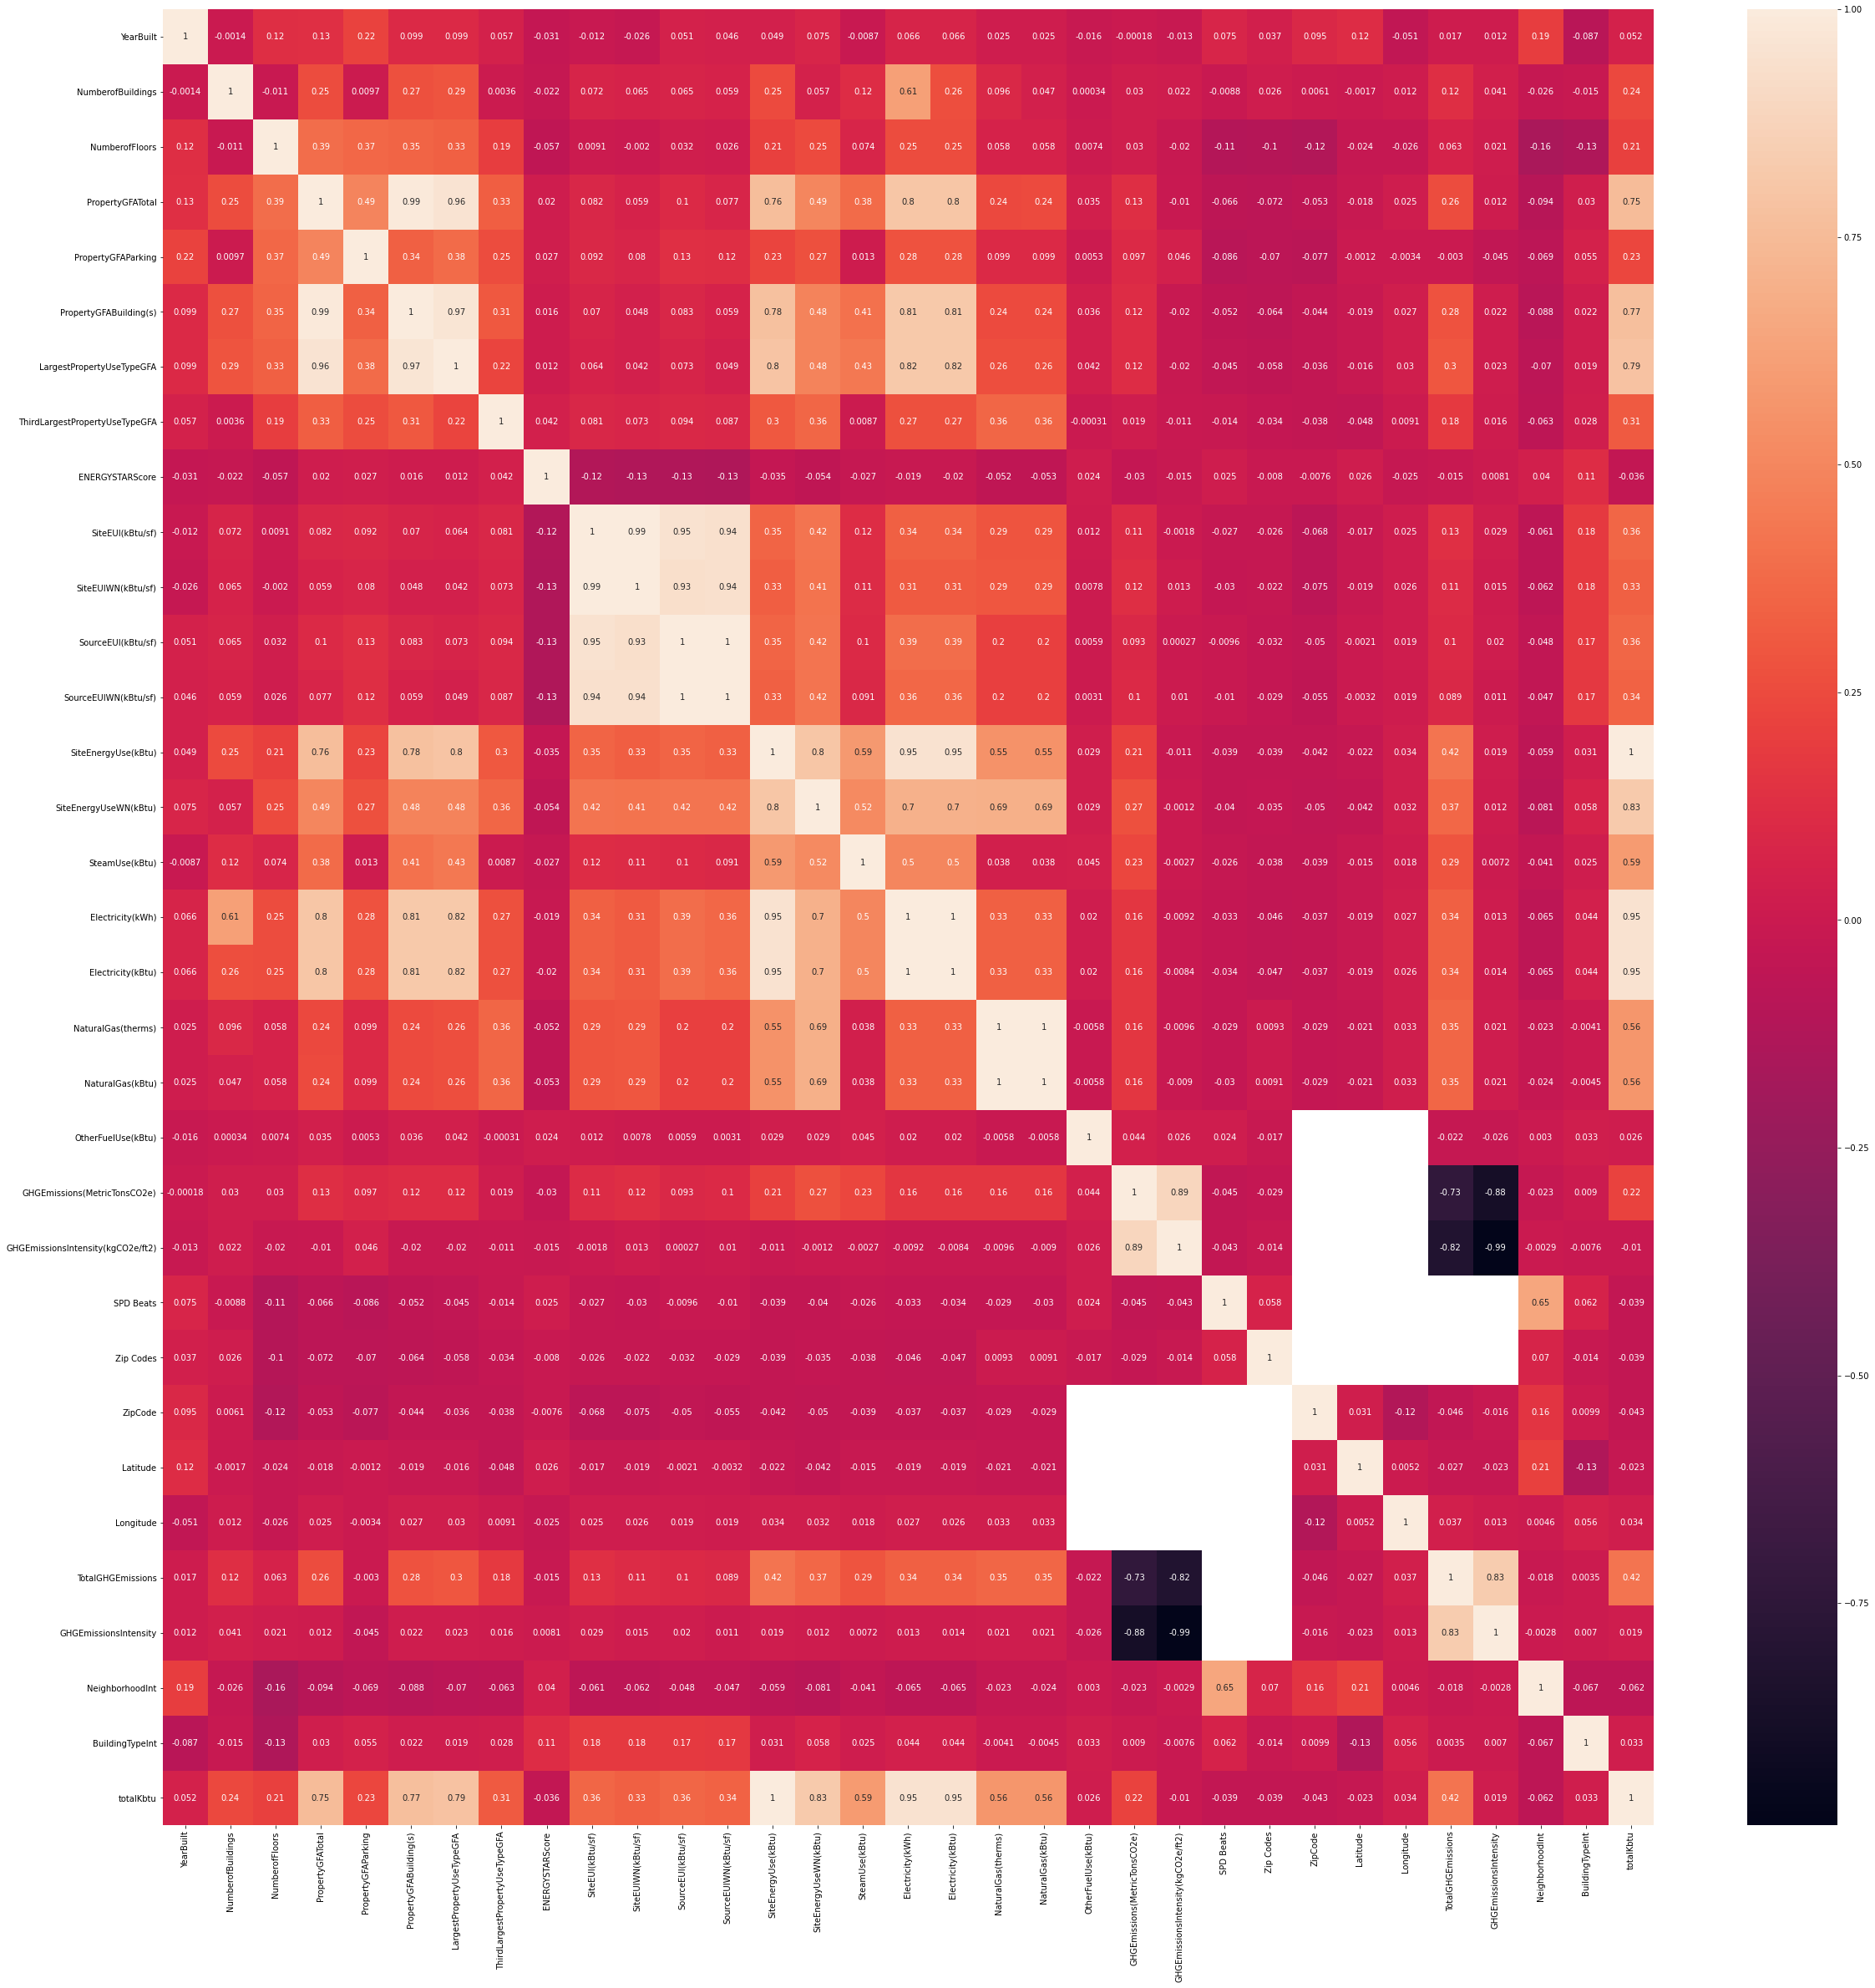

In [172]:
#correlations = dataF.corr(method="kendall")
#correlations = dataF.corr(method="spearman")


correlations = cleanDataF.filter(items=columnsToBeFiltered).corr(method="pearson")
f, ax = plt.subplots(figsize = (40, 40))
#regarder la distance par défault dans heatmap
figure = sns.heatmap(correlations, annot = True).get_figure()
figure.savefig("./Visuals/originalDFheatmap.jpg")

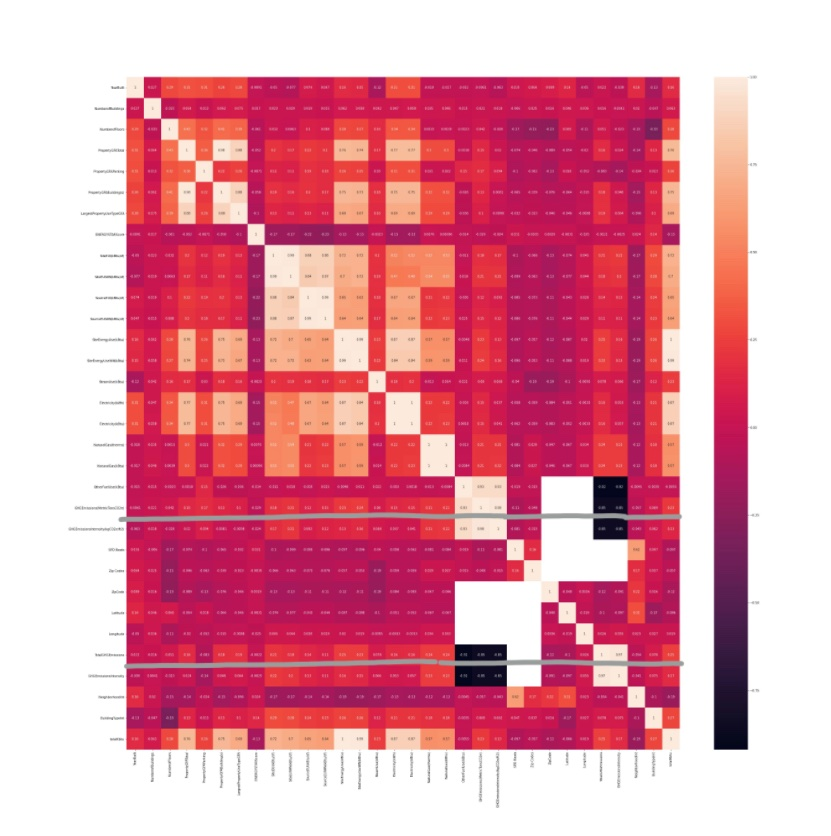

### L'élaboration d'un heatmap permet de visualiser les futurs phenomènes que nous devrons prevoir. Sur le graph ci-dessus, les 2 phénomènes sont marqués en gris. 

<b>On y observe qu'ils sont assez liés (> 0.25) à un grand nombre de valeur notamment des valeurs descriptives des batiments comme : </b>

- 'YearBuilt'
- 'PropertyGFATotal'
- "Location"
- "LargestPropertyUseType"
- "PropertyGFAParking"
- "NumberofFloors"
- "NumberofBuildings"
- 'NeighborhoodEnc'

# Scatter Matrix CO2 

green     4413
black     1623
yellow     569
red        111
Name: ENERGYSTARScoreColor, dtype: int64


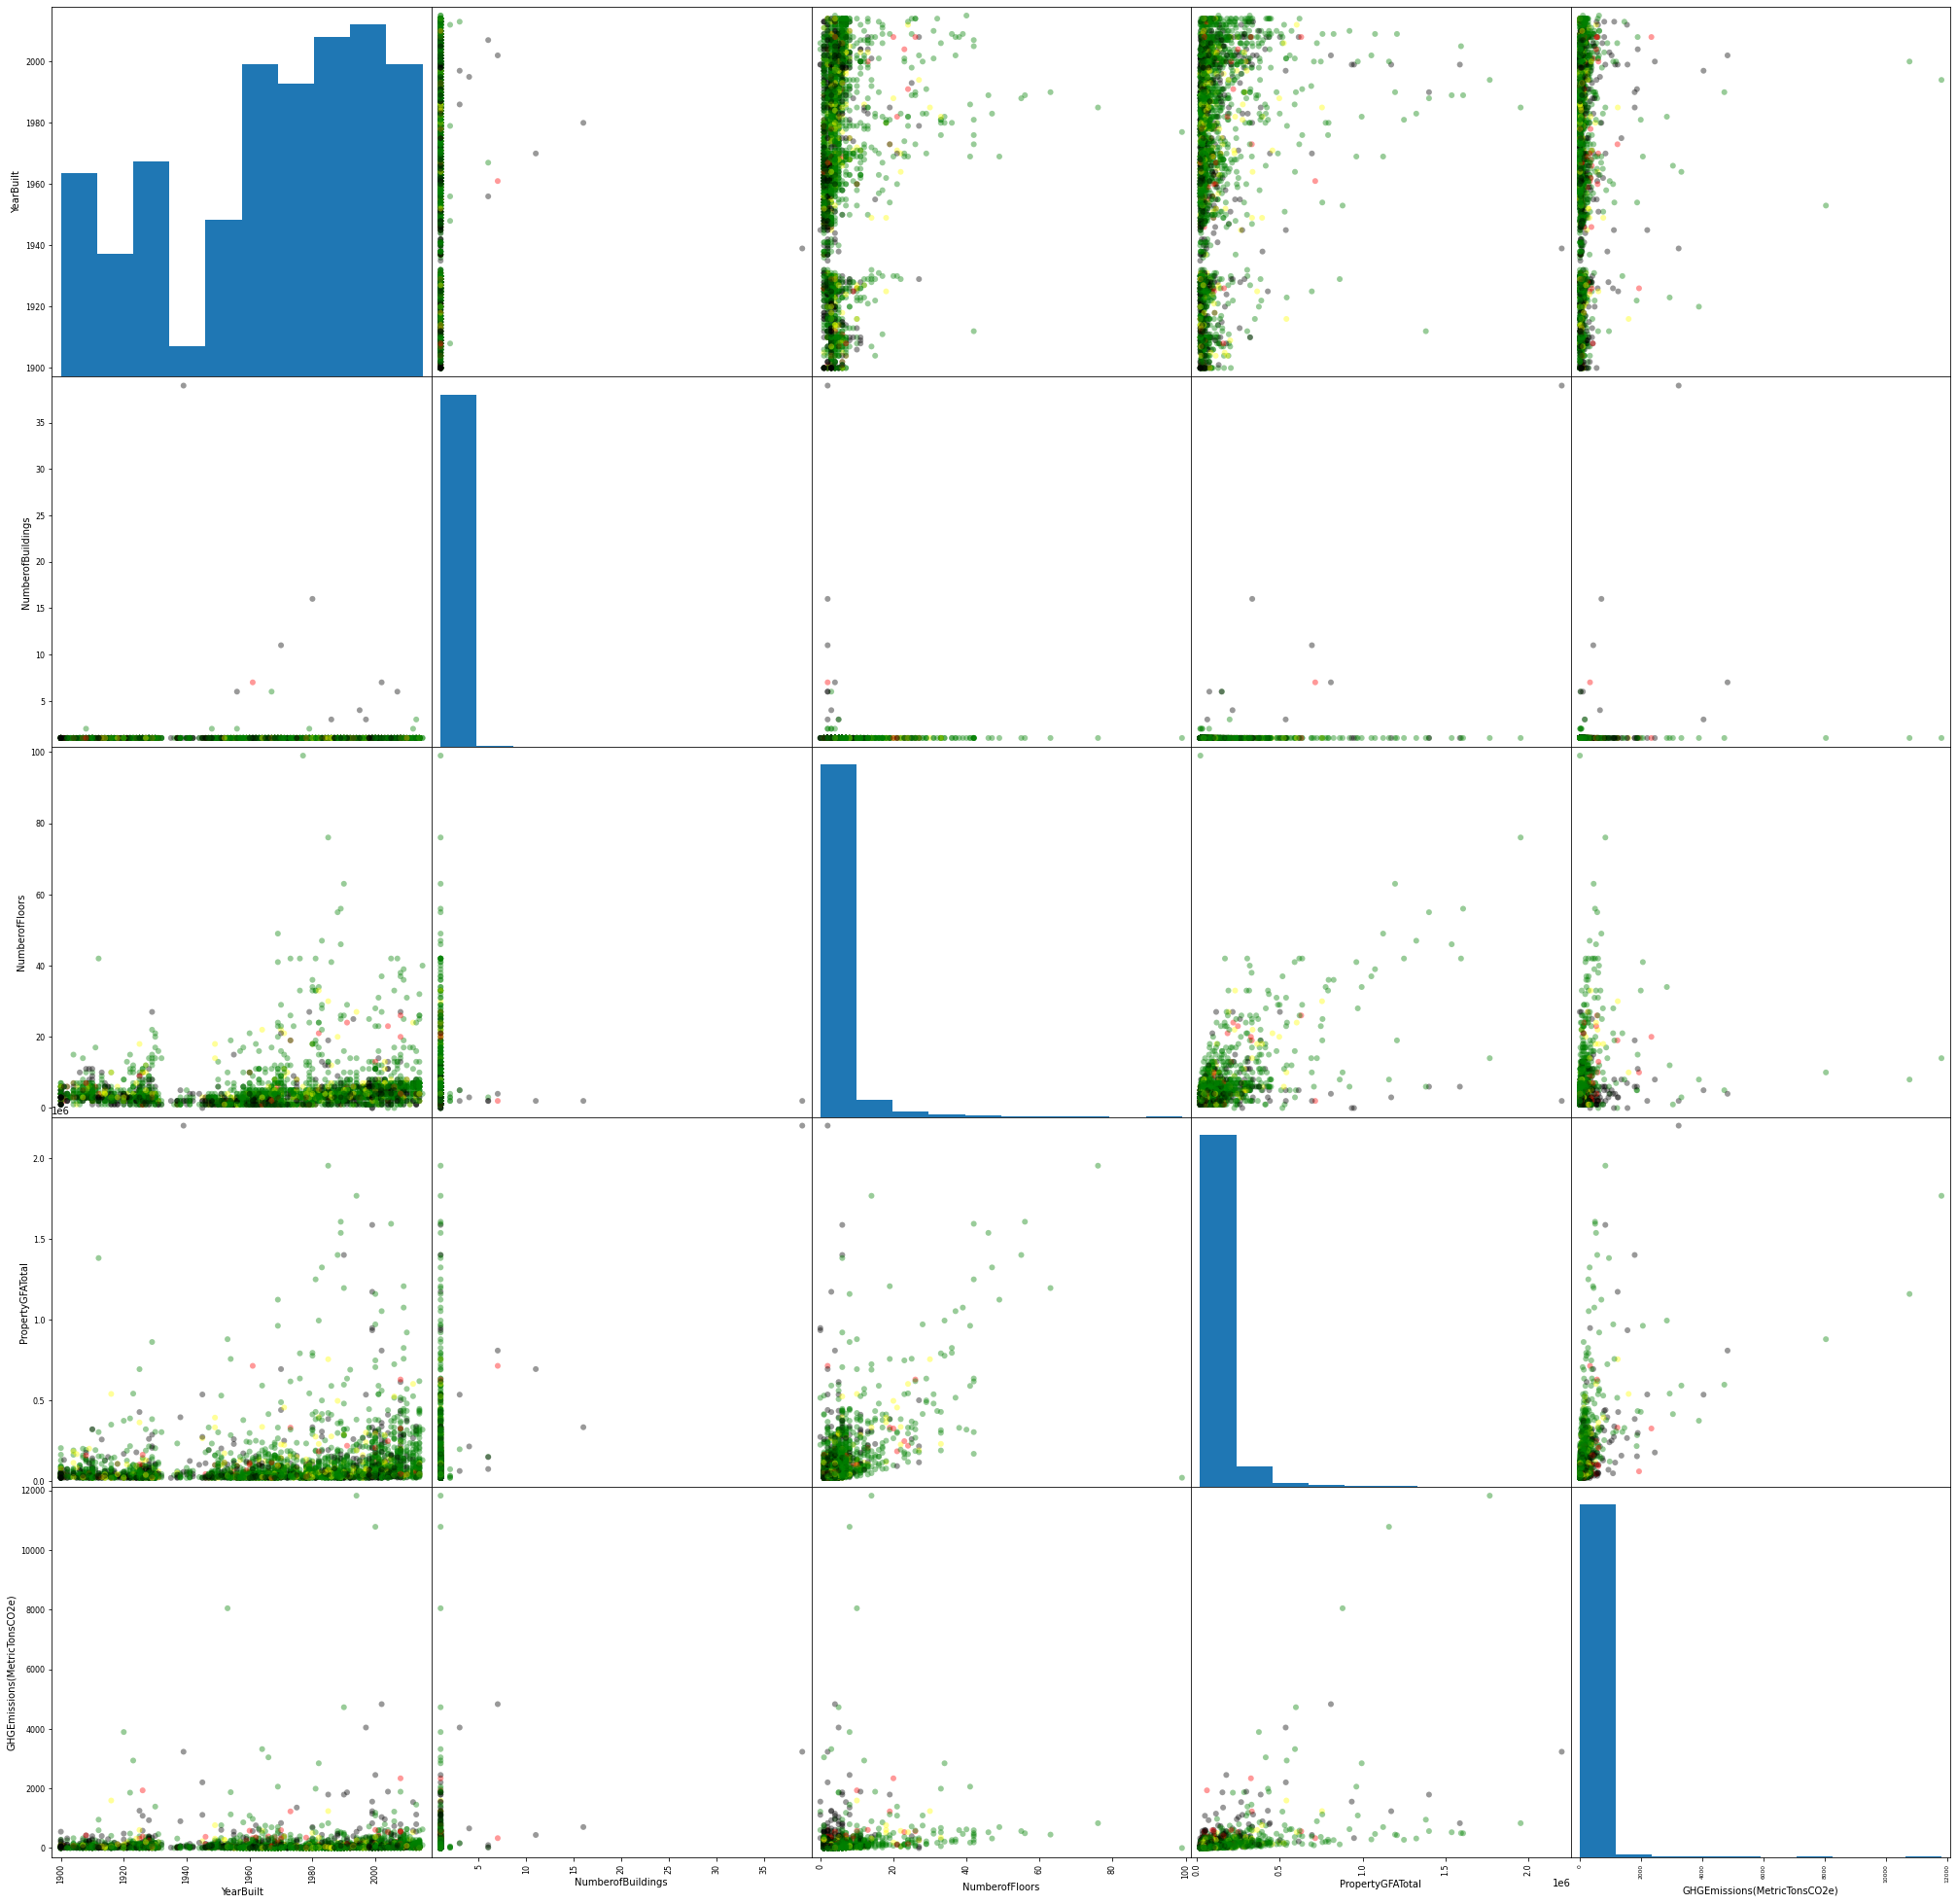

In [189]:
#c=list(filteredDF["ENERGYSTARScoreColor"].values
#avec CO2
print(cleanDataF['ENERGYSTARScoreColor'].value_counts())
filter = ['YearBuilt', 
          'NumberofBuildings', 
          'NumberofFloors', 
          'PropertyGFATotal', 
          'LargestPropertyUseType',
          'GHGEmissions(MetricTonsCO2e)',
          'State',
          "PrimaryPropertyType", 
          'Neighborhood', 
          'BuildingType',
          #'TotalGHGEmissions',
          'ENERGYSTARScoreColor']
          

filteredDF = cleanDataF.filter(items=filter)
filteredDF = filteredDF[filteredDF["NumberofBuildings"] > -100]
filteredDF = filteredDF[filteredDF["NumberofFloors"] > -100]
filteredDF = filteredDF[filteredDF["PropertyGFATotal"] > -100]
filteredDF = filteredDF[filteredDF["GHGEmissions(MetricTonsCO2e)"] > -100]
#filteredDF = filteredDF[filteredDF["TotalGHGEmissions"] > -100]
filteredDF = filteredDF[filteredDF["ENERGYSTARScoreColor"].isin(["red", "green", "black", "yellow"])]

g = pd.plotting.scatter_matrix(filteredDF, 
                               c=list(filteredDF["ENERGYSTARScoreColor"]), 
                               figsize=(35,35),  marker = '°',  alpha = 0.4)

plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()


# Scatter Matrix GHGE 

green     4413
black     1623
yellow     569
red        111
Name: ENERGYSTARScoreColor, dtype: int64


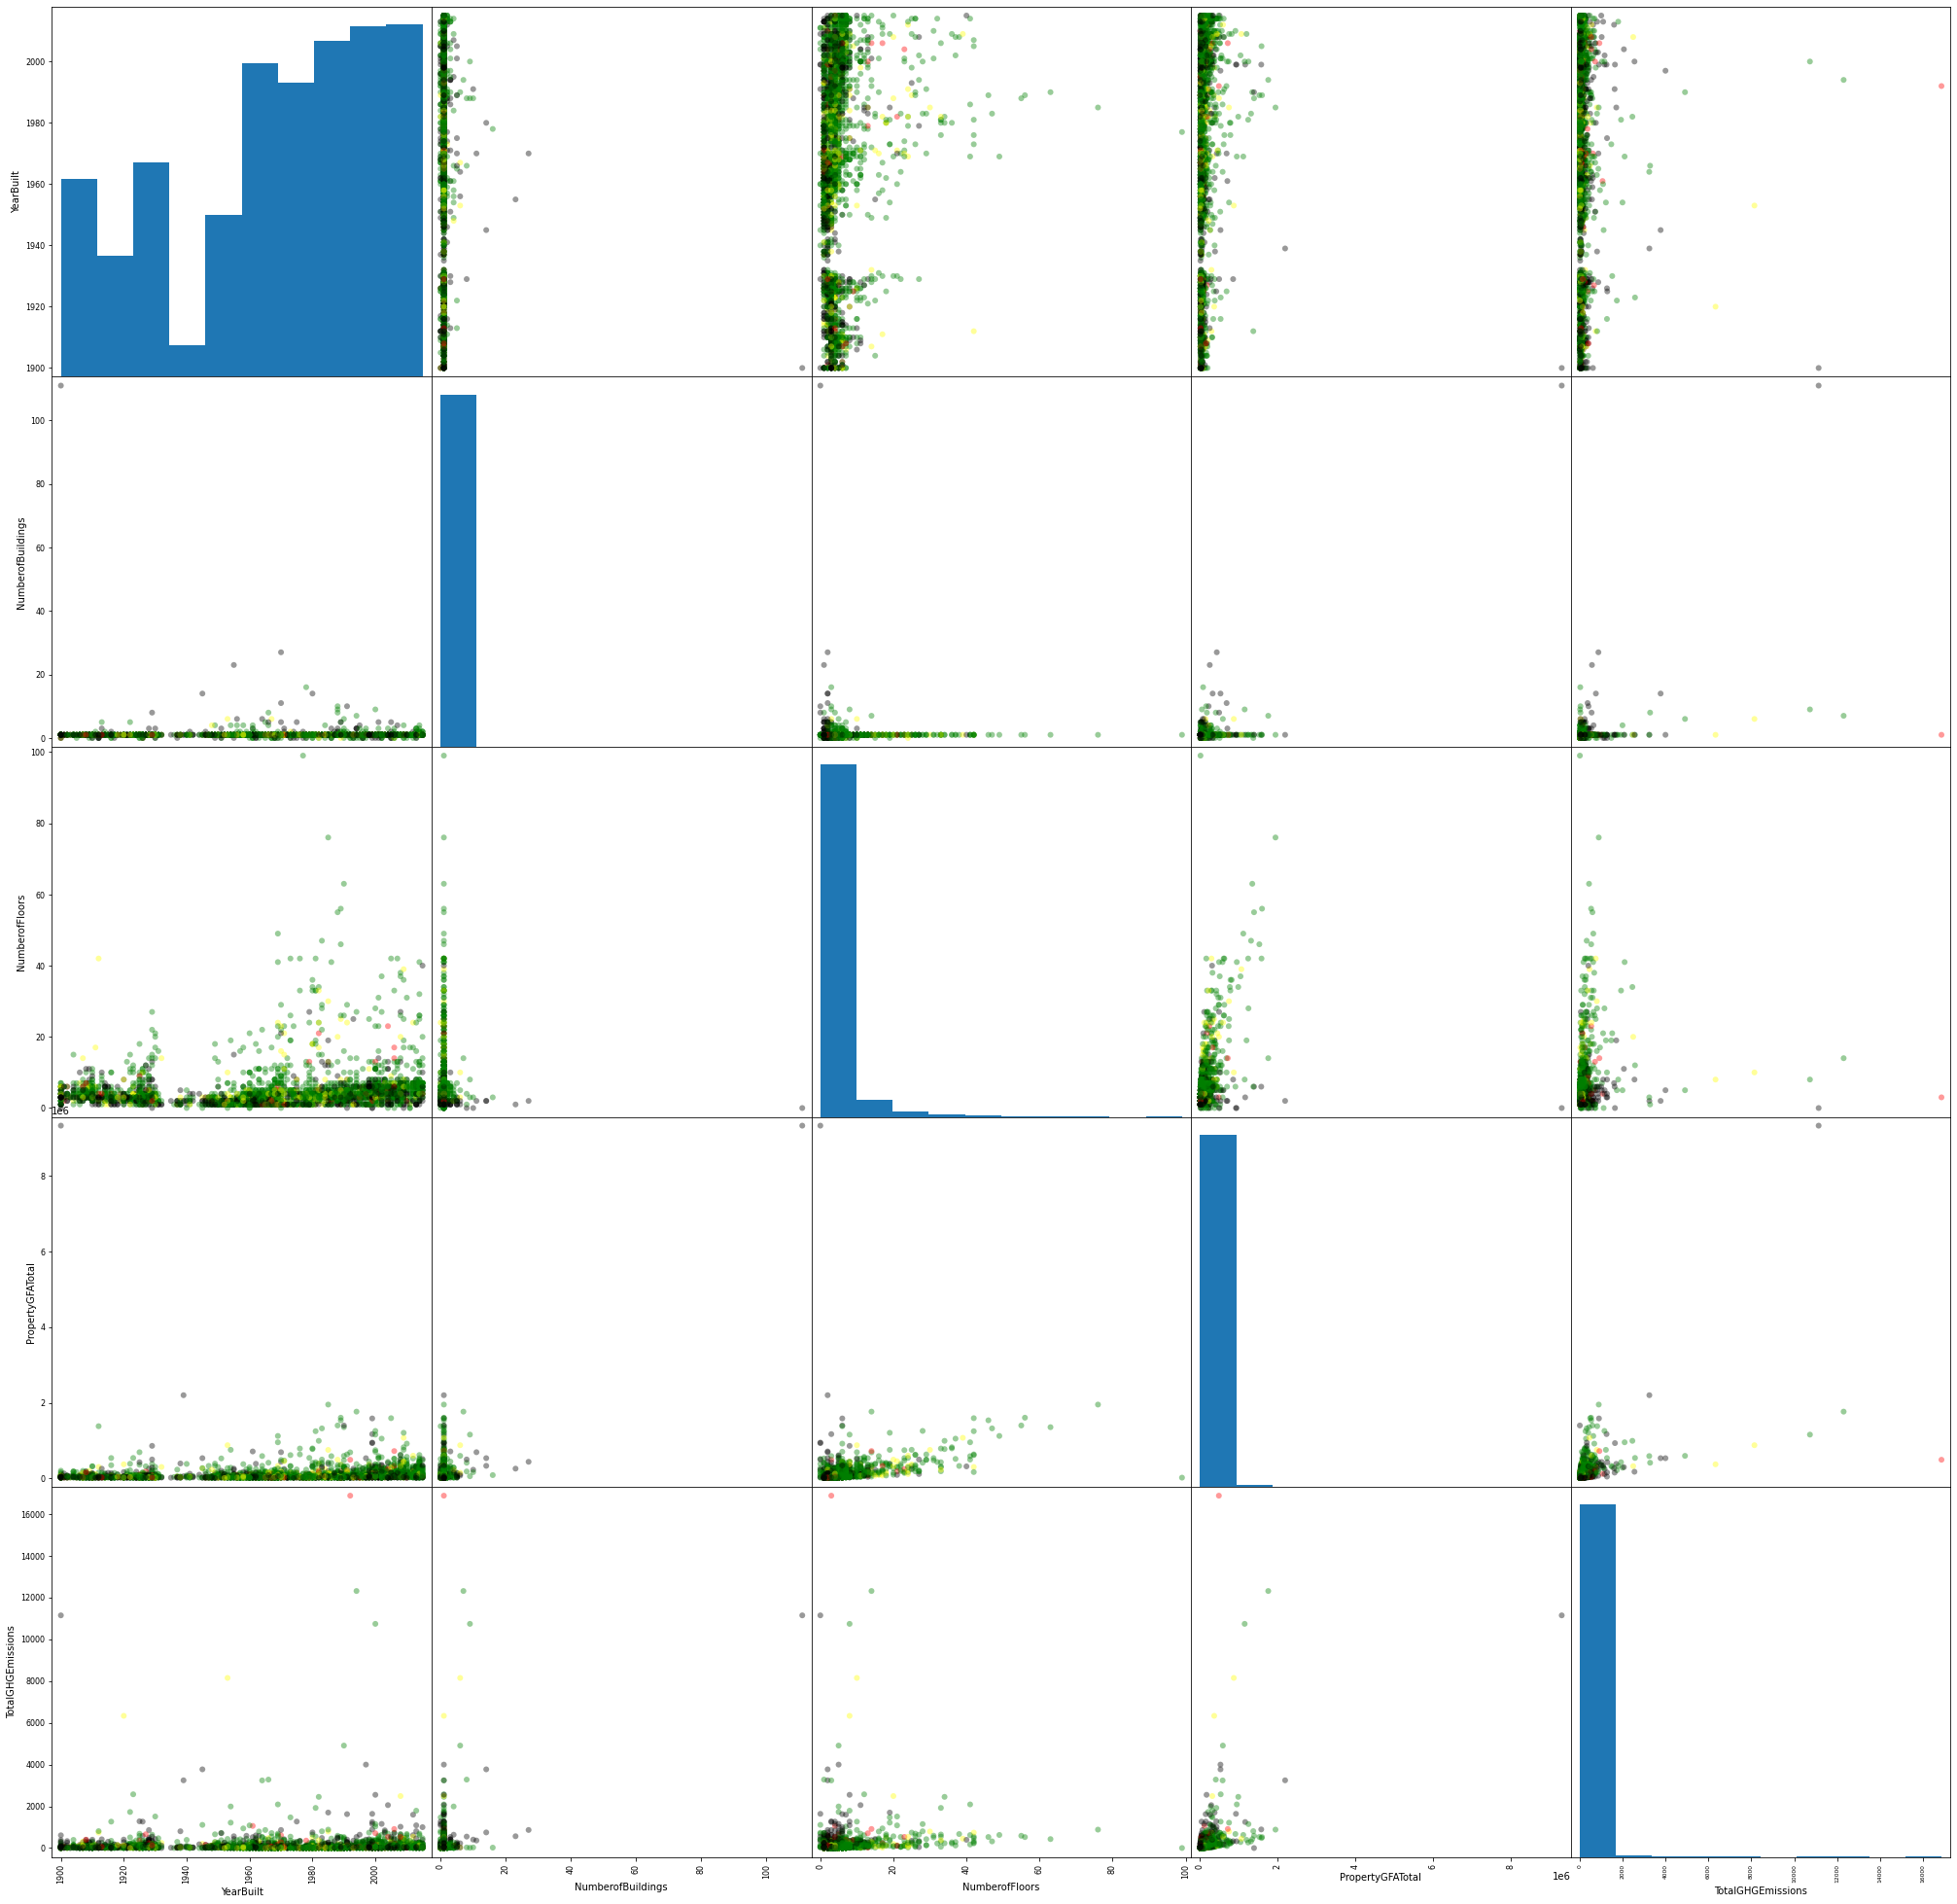

In [191]:
#c=list(filteredDF["ENERGYSTARScoreColor"].values
#avec GHGE
print(cleanDataF['ENERGYSTARScoreColor'].value_counts())
filter = ['YearBuilt', 
          'NumberofBuildings', 
          'NumberofFloors', 
          'PropertyGFATotal', 
          'LargestPropertyUseType',
          #'GHGEmissions(MetricTonsCO2e)',
          'State',
          "PrimaryPropertyType", 
          'Neighborhood', 
          'BuildingType',
          'TotalGHGEmissions',
          'ENERGYSTARScoreColor']
          

filteredDF = cleanDataF.filter(items=filter)
filteredDF = filteredDF[filteredDF["NumberofBuildings"] > -100]
filteredDF = filteredDF[filteredDF["NumberofFloors"] > -100]
filteredDF = filteredDF[filteredDF["PropertyGFATotal"] > -100]
#filteredDF = filteredDF[filteredDF["GHGEmissions(MetricTonsCO2e)"] > -100]
filteredDF = filteredDF[filteredDF["TotalGHGEmissions"] > -100]
filteredDF = filteredDF[filteredDF["ENERGYSTARScoreColor"].isin(["red", "green", "black", "yellow"])]

g = pd.plotting.scatter_matrix(filteredDF, 
                               c=list(filteredDF["ENERGYSTARScoreColor"]), 
                               figsize=(35,35),  marker = '°',  alpha = 0.4)

plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()

### Etape Export des dataframes traités pour l'étape de modelisation. 

In [ ]:
filteredDF.to_csv("filteredDF.csv")
nonNullRateFrame.to_csv("nonNullFrame.csv")